In [47]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

from joblib import dump, load

import matplotlib.pyplot as plt

In [75]:
train_df = pd.read_csv("./Dataset/clean/cleaned_train_set.csv")
train_df.head()

,Review,Sentiment,word count
0,remember seeing preview movie really thinking ...,1,222
1,couple farmer struggle life small village chin...,0,113
2,looked comment thoroughly amused find clearly ...,0,62
3,time period exhaustively covered television me...,0,242
4,though piece uneven collection 11 short film t...,1,78


In [8]:
X = train_df['Review']
Y = train_df['Sentiment']

## Vectorizing Data

In [9]:
vect = TfidfVectorizer()
X = vect.fit_transform(train_df['Review'])

In [32]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [33]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_val: ", (x_val.shape))
print("Size of y_val: ", (y_val.shape))

Size of x_train:  (22411, 134245)
Size of y_train:  (22411,)
Size of x_val:  (2491, 134245)
Size of y_val:  (2491,)


In [34]:
# fit the model
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [35]:
predictions = clf.predict(x_val)
print(accuracy_score(y_val,predictions)*100)

89.00040144520273


c:\users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


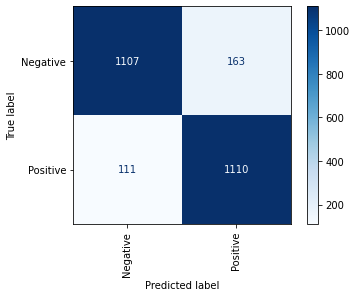

In [38]:
plot_confusion_matrix(clf, x_val, y_val, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

The model correctly identified 1107 negative reviews while misclassifying 111 of them. It correctly identified 1110 positive reviews and got it wrong 111 times.

### Evaluation on Test Dataset

In [91]:
test_df = pd.read_csv("./Dataset/clean/cleaned_test_set.csv")
test_df.head()
X_test = test_df['Review']
Y_test = test_df['Sentiment']

In [90]:
test_pred = clf.predict(vect.transform(X_test))
print(accuracy_score(Y_test,test_pred)*100)

98.26519958236287


c:\users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


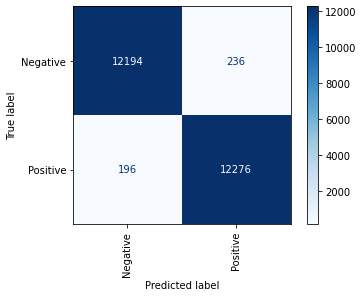

In [86]:
plot_confusion_matrix(clf, vect.transform(X_test), Y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

#### Note:
The performance of the model are better on test dataset. 
It correctly classified 12194 negative review and misclassified only 196 positive reviews. It correctly classified 12276 positive review and misclassified only 236 negative ones.

## Save Model

In [39]:
dump(clf, './models/ML_solution/svm_classifier.joblib') 

['./models/ML_solution/svm_classifier.joblib']

In [87]:
#svm_clf = load('./models/ML_solution/svm_classifier.joblib')

# Predict on new data

In [76]:
review = 'It was a fabulous movie.'
clf.predict(vect.transform([review]))

array([1], dtype=int64)

In [81]:
review = 'It was awful.'
clf.predict(vect.transform([review]))

array([0], dtype=int64)